# Статистика, DS-поток
## Практическое задание 3

В данном задании вы найдете оценки максимального правдоподобия по реальным данным для некоторых вероятностных моделей, посмотрите на свойства робастных оценок и исследуете оценки в схеме Бернулли.


**Правила:**

* Дедлайн **24 октября 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds20_bot`.
* Прислать нужно ноутбук в формате `ipynb`.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 -  10 баллов **О2**
* Задача 2 -  7 баллов **О3**
* Задача 3 -  5 баллов **О3**
* Задача 4 -  15 баллов **О2**
* Задача 5a -  5 баллов **О2**
* Задача 5b -  10 баллов **О3**
* Задача 6 -  15 баллов **О3**

______________
### Задача 1. Wine
В этой задаче нужно сделать оценку максимального правдоподобия для многомерного нормального распределения по датасету химимического анализа вин трех разных сортов в Италии.
Скачайте данные по ссылке https://archive.ics.uci.edu/ml/datasets/wine (файл `wine.data`) и загрузите их с помощью библиотеки pandas.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sps

In [3]:
from pathlib import Path
path = Path.cwd()
path = path.joinpath('../../data/raw/MatStat5Sem')

col_names = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 
                'Magnesium', 'Total phenols', 'Flavanoids',
                'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity',
                'Hue', 'OD280/OD315 of diluted wines', 'Proline']

wine_data = pd.read_csv(path.joinpath('wine.data'), names=col_names)
wine_data.head(10)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


Пусть выборка $X = (X_1, ..., X_n)$ такова, что каждый ее элемент имеет многомерное нормальное распределение со средним вектором $a \in \mathbb {R} ^d$ и матрицей ковариаций $\Sigma \in \mathbb {R} ^ {d \times d}$.

Запишите оценку максимального правдоподобия для параметров $a$ и $\Sigma$.

**Ответ:** из $4$-го теор. дз известно, что ОМП для $\mathbf{a}$ есть $\frac{1}{n}\sum_{i=1}^n \mathbf{X_i} = \overline{\mathbf{X}}$, а ОМП для $\Sigma$ суть $\frac{1}{n}\sum_{i=1}^n (\mathbf{X_i} - \mathbf{a})(\mathbf{X_i} - \mathbf{a})^T = \frac{1}{n}\sum_{i=1}^n (\mathbf{X_i} - \overline{\mathbf{X}})(\mathbf{X_i} - \overline{\mathbf{X}})^T$ (при неизвестном $\mathbf{a}$).

Рассмотрим колонки "Alcalinity of ash", "Nonflavanoid phenols", "Proanthocyanins", "Hue" для всех сортов вина вместе.
Предположим, что данные в них образуют выборку из многомерного нормального распределения с неизвестными параметрами, которые вам нужно оценить.

Визуализируйте рассматриваемые данные с помощью `seaborn.pairplot`, чтобы убедиться в том, что данные визуально похожи на нормальное распределение:

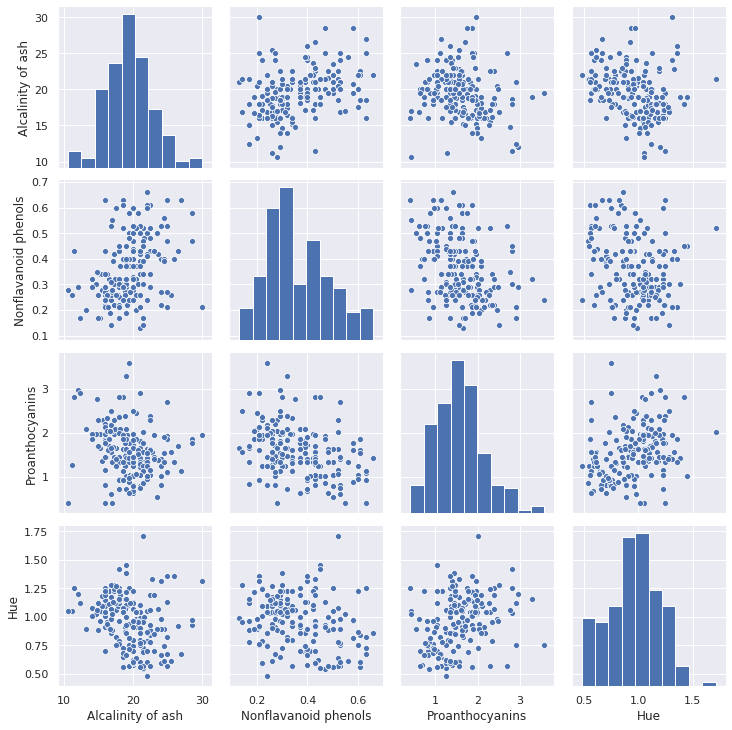

In [3]:
sns.set()
sample = wine_data[["Alcalinity of ash", "Nonflavanoid phenols",
                        "Proanthocyanins", "Hue"]]
sns.pairplot(sample);

Напишите функцию подсчета оценки максимального правдоподобия для вектора средних $\mu$ и матрицы ковариаций $\Sigma$ по выборке. Использование циклов наказуемо.

In [4]:
def mle_for_mean(sample):
    """
    :param sample: выборка из многомерного нормального распределения
    :return: ОМП для вектора средних
    """
    
    return np.array(sample).mean(axis=0)

In [5]:
def mle_for_covariance_matrix(sample):
    """
    :param sample: выборка из многомерного нормального распределения
    :return: ОМП для матрицы ковариаций
    """
    sample = np.array(sample)
    centered = sample - mle_for_mean(sample)
    # Будем пользоваться Broadcasting rules.
    # Пусть Х --- матрица, составленная из векторов, тогда в виду представления
    # в numpy первая строка --- это первый вектор и т. д. Поэтому, чтобы получить
    # вектор в нормальном смысле, нужно транпонировать Х. А теперь что мы делаем:
    # размеры Х.T[::newaxis] есть (m, n, 1) => при X.T * X второй множитель,
    # имея размеры (n, m) превратится в (1, n, m) => общий размер суть (m, n, m).
    # Т. о. X.T растянется по оси z, а X растянется по оси x, поэтому вдоль
    # оси у будут получены матрицы из покомпонентных произведений векторов.
    x_shape = centered.shape[0]
    y_shape = centered.shape[1]
    return (centered.T[::np.newaxis].reshape(y_shape, x_shape, 1) * centered).mean(axis=1)

In [6]:
mu = mle_for_mean(sample)
sigma = mle_for_covariance_matrix(sample)

Визуализируйте полученный результат. Для каждой пары признаков постройте информативный график, на котором будут:

1) Точки выборки.

2) Плотность нормального распределения с оцененными параметрами, которую изобразите в виде линий уровня.

**hint:** используйте функции `plt.pcolormesh` и `plt.clabel`

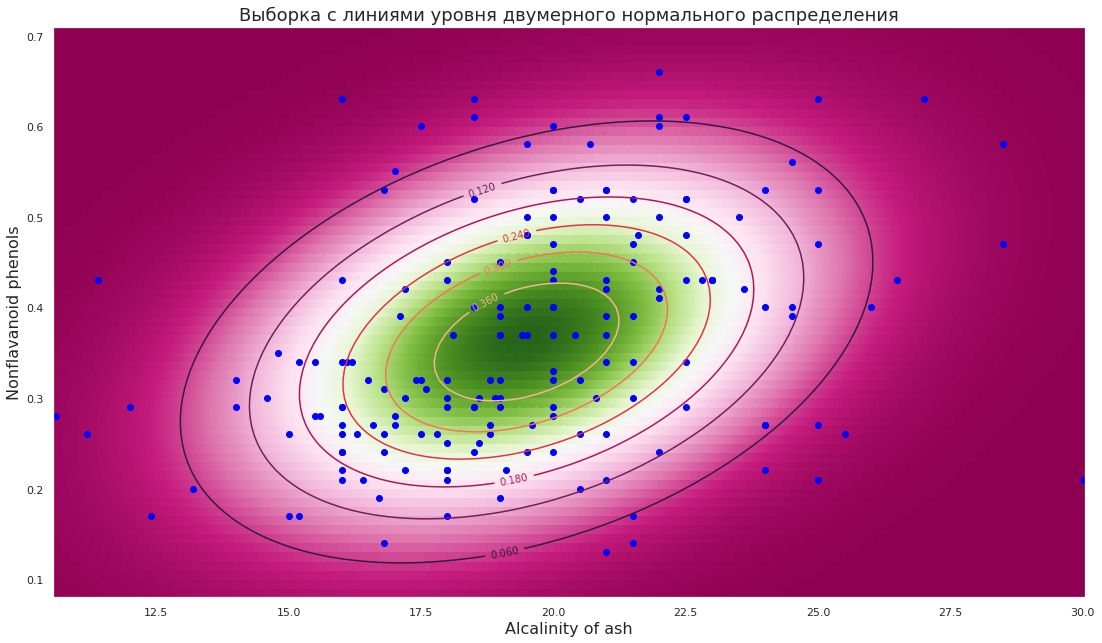

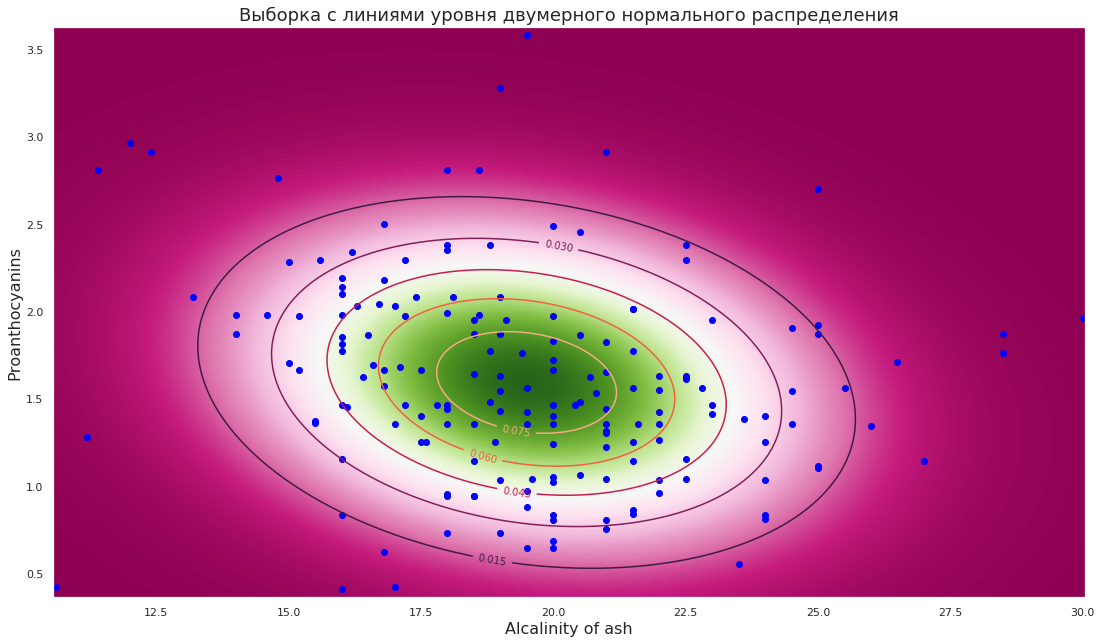

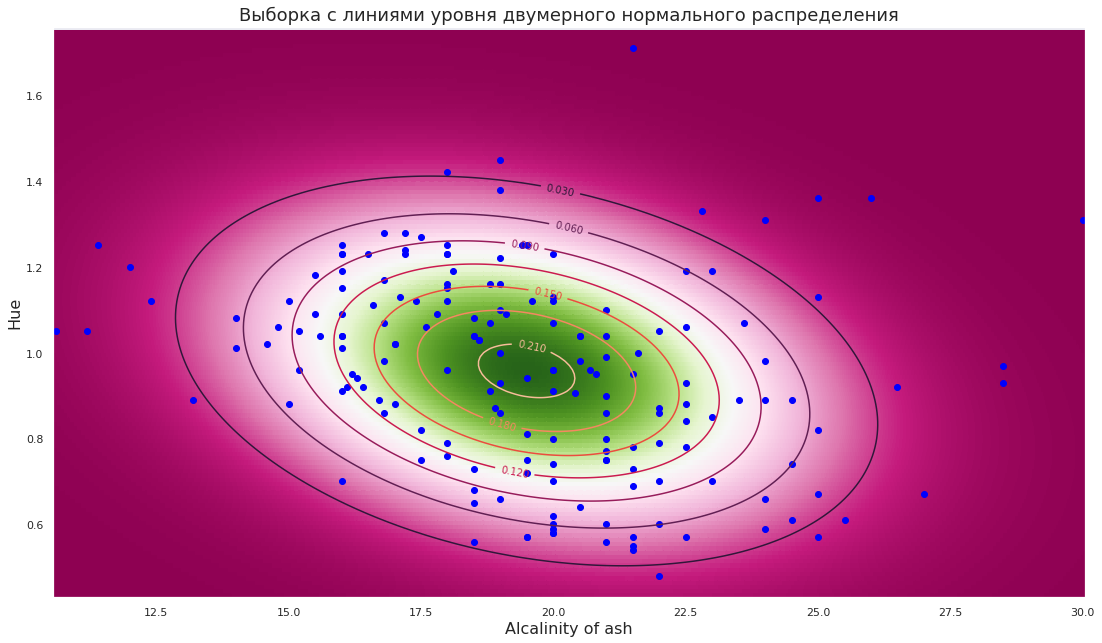

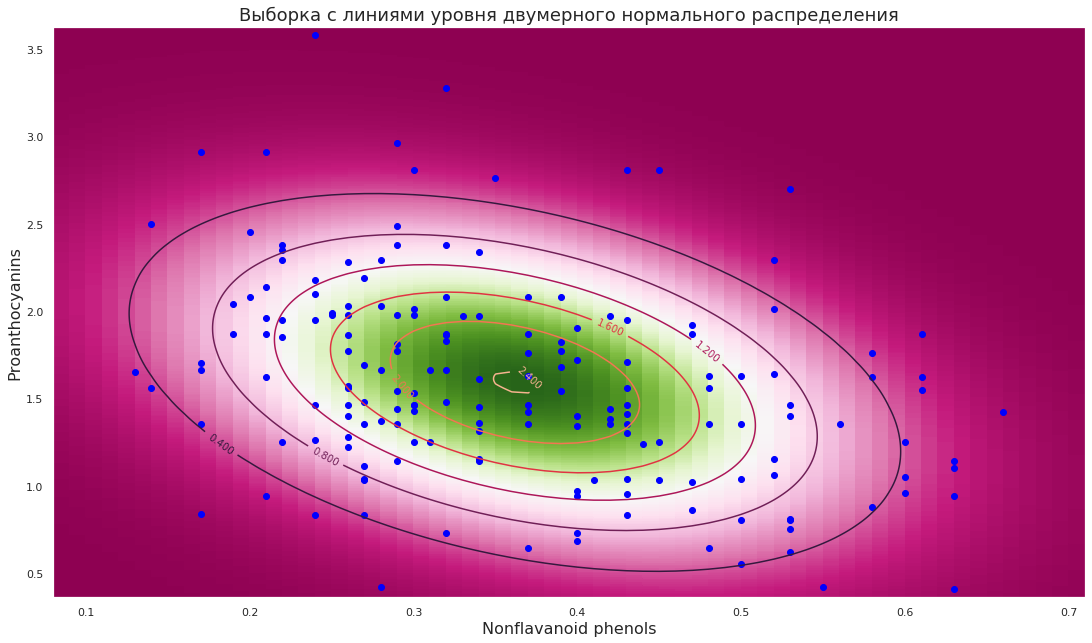

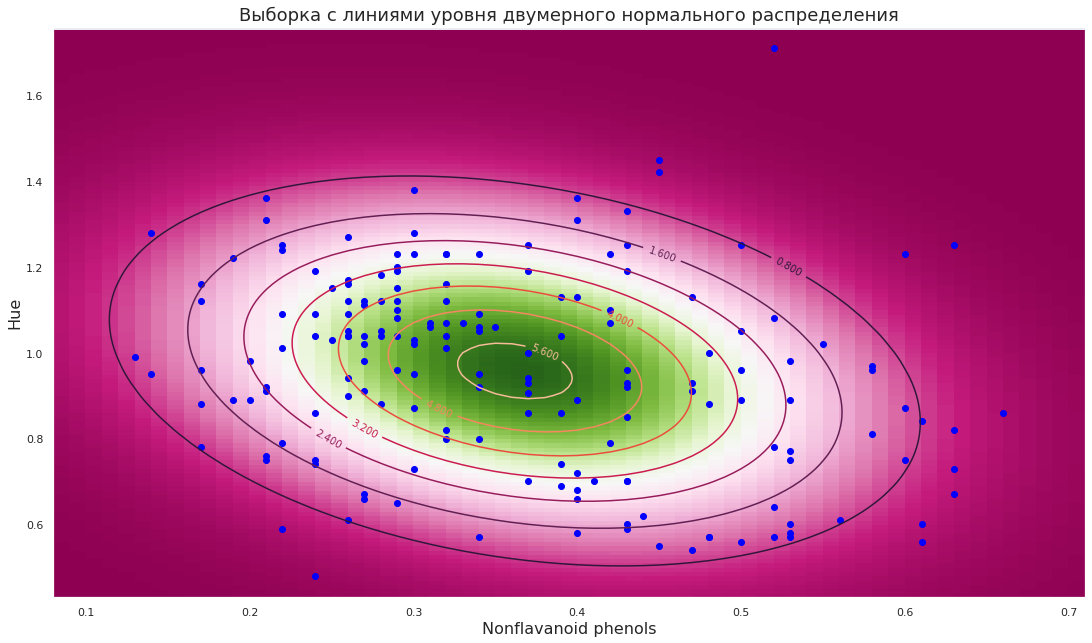

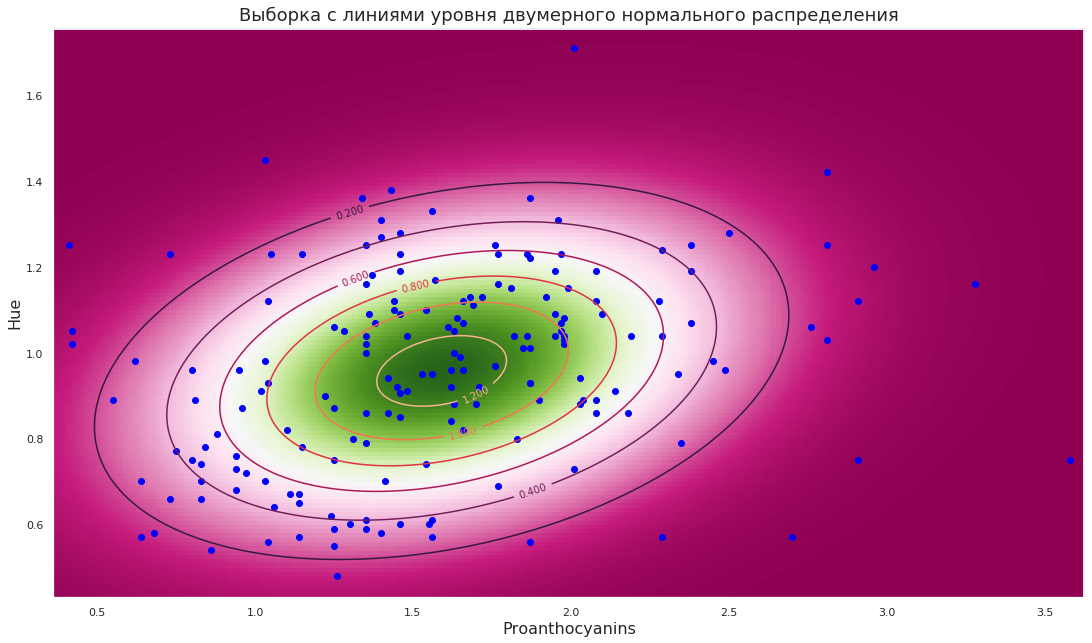

In [8]:
combinations = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
# combinations = [[0, 1]]
for features in combinations:
    # Создаём двумерное нормальное распределение.
    i = features[0]
    j = features[1]
    cov = [[sigma[i, i], sigma[i, j]], [sigma[j, i], sigma[j, j]]]
    rv = sps.multivariate_normal(mean=mu[[i, j]], cov=cov)
    
    i_col_name = sample.columns[i]
    j_col_name = sample.columns[j]
    x_min = sample[i_col_name].min()
    x_max = sample[i_col_name].max()
    y_min = sample[j_col_name].min()
    y_max = sample[j_col_name].max()
    
    # Отображаем линии уровня функции распределения,
    # а также закрашиваем области между ними
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    x, y = np.mgrid[x_min-.05 : x_max+.05 : .01,\
                    y_min-.05 : y_max+.05 :.01]
    pdf = rv.pdf(np.dstack((x, y)))
    CS = ax.contour(x, y, pdf)
    ax.clabel(CS, inline=1, fontsize=10)
    ax.pcolormesh(x, y, pdf, cmap=plt.get_cmap('PiYG'))
    
    # Отображаем выборки
    ax.set_xlabel(i_col_name, fontsize=16)
    ax.set_ylabel(j_col_name, fontsize=16)
    ax.set_title('Выборка с линиями уровня двумерного нормального распределения',
             fontsize=18)
    ax.set_xlim((x_min-.05, x_max+.05))
    ax.set_ylim((y_min-.05, y_max+.05))
    ax.scatter(sample[i_col_name], sample[j_col_name], c='blue')


**Вывод:** выборка действительно неплохо согласуется с плотностью многомерного нормального распределения с заданными параметрами. Так что предположение о том, что данные в этих колонках образуют выборку из многомерного нормального распределения с неизвестными параметрами, которые были оценены, справедливо.

__________________
### Задача 2. Airquality

**1.** Загрузите с помощью `pandas` из файла `airquality.csv` данные о качестве воздуха в Нью-Йорке с мая по сентябрь 1973 года по дням. Данные содержат измерения нескольких величин, описания которых можно прочитать [по ссылке](https://www.rdocumentation.org/packages/datasets/versions/3.5.1/topics/airquality).

In [9]:
air_data = pd.read_csv(path.joinpath('airquality.csv'))
air_data.head(10)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
5,28.0,NaN,14.9,66,5,6
6,23.0,299.0,8.6,65,5,7
7,19.0,99.0,13.8,59,5,8
8,8.0,19.0,20.1,61,5,9
9,NaN,194.0,8.6,69,5,10


Выведите описательные статистики (метод `describe`) для всех признаков, для которых это имеет смысл.  Округлите до второго знака после запятой.

In [10]:
pd.set_option("display.precision", 2)
air_data.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.00,146.00,153.00,153.00,153.00,153.00
mean,42.13,185.93,9.96,77.88,6.99,15.80
std,32.99,90.06,3.52,9.47,1.42,8.86
min,1.00,7.00,1.70,56.00,5.00,1.00
25%,18.00,115.75,7.40,72.00,6.00,8.00
50%,31.50,205.00,9.70,79.00,7.00,16.00
75%,63.25,258.75,11.50,85.00,8.00,23.00
max,168.00,334.00,20.70,97.00,9.00,31.00


Что можно сказать о наличии в данных выбросов, сравнивая выборочную медиану и выборочное среднее?

**Ответ:** у колонки "Ozone" сильно различаются выборочная медиана и выборочное среднее: аж на $33\%$ по отношению к медиане, что явно говорит о наличии выбросов. Так же подозрительной является колонка "Solar.R", в ней относительное различие составляет около $10\%$ по отношению к медиане.

**2.** Теперь для каждого параметра постройте график ящиков с усами (`boxplot`), в котором ось `x` соответствует номеру месяца, а ось `y` — значениям параметра (т.е. свой ящик для каждого месяца). Используйте функцию `seaborn.boxplot`.

In [11]:
air_data.columns

Index(['Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object')

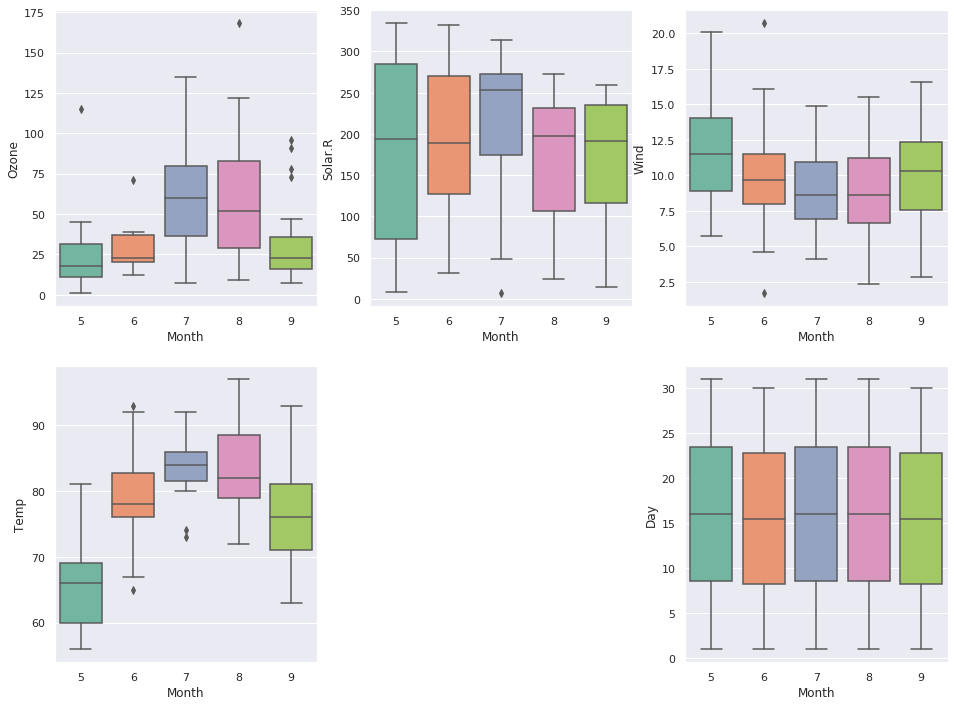

In [12]:
plt.figure(figsize=(16, 12))
for i, column in enumerate(air_data.columns):
    if column != 'Month':
        plt.subplot(2, 3, i+1)
        sns.boxplot(x='Month', y=column, data=air_data, palette='Set2');

Опишите структуру `boxplot`. Какие выводы можно сделать в данном случае?

**Ответ:** 1) Больше всего выбросов в колонке "Ozone". Как раз это и дало сильное отличие выборочной медианы от среднего выборочного.

2) В колонке "Solar.R" очень большой разброс данных: блоки очень широкие, т.е. большая выборочная дисперсия.

3) В колонке "Wind" небольшой разброс данных, медианы самые маленькие в $7, 8$ месяцы, т.е. слабее всего ветер в летом.

4) В измерениях температуры тоже достаточно много выбросов, к тому же она сильно зависит от месяца, поэтому медианы, как, в общем-то, и сами ящики с усами, сильно сдвинуты относительно друг друга по оси y. Самые жаркий --- июль месяц, там медиана самая высокая.

5) Так как во всех месяцах почти одинаковое число дней, параметры выборки примерно одинаковые, что мы и видим по `boxplot`-ам. В июне и сентрябре по $30$ дней, поэтому медианы там чуть пониже.

**3.** Для параметра с наибольшим числом наблюдений, признанных выбросами, посчитайте и сравните: 
- выборочное среднее 
- выборочную медиану
- медиану средних Уолша.

Вычисление медианы средних Уолша без циклов будет поощряться (дополнительный **1 балл**).  
**Подсказки:** 
1. Что будет, если вы сложите вектор-строку и вектор столбец одинакового размера?
2. Если вы правильно ответите на прошлый вопрос, вам пригодится `np.triu_indices_from`

In [13]:
sample = air_data['Ozone']
print('Выборочное среднее {0:.3f}'.format(sample.mean()))
print('Выборочная медиана {0:.3f}'.format(sample.median()))
# Если сложить вектор-строку и вектор столбец одинакового размера, 
# то получится матрица A попарных сумм элементов вектора.
# Тогда медиана сплюснутой A/2 даст медиану средних Уолша.
pairwise_sums = np.array(sample.dropna()).reshape(-1, 1) + np.array(sample.dropna())
print('Медиана средних Уолша {0:.3f}'.format(np.median(pairwise_sums / 2)))

Выборочное среднее 42.129
Выборочная медиана 31.500
Медиана средних Уолша 38.500


Какими свойствами статистик вызваны наблюдаемые различия?

**Ответ:** выборочнее среднее неустойчиво к выбросам, поэтому сильно завышено и плохо отражает среднее большинства значений выборки. Асимптотическая толерантность медианы равна $0.5$, поэтому она наиболее устойчива к выбросам и лучше всего отражает середину значений выборки. Медиана средних Уолша менее устойчива к выбросам, которые её завысили относительно выборочной медианы, но всё же не так сильно, как выборочное среднее.

При подсчете этих статистик обычно предполагается, что наблюдения независимы. Выполнено ли это свойство в данном случае?

**Ответ:** вообще говоря, не выполнено, так как все данные об, например, озоне были получены с острова Рузвельта, а наблюдения велись каждый день. Зависимость может выражаться так: пусть есть какое-то значение толщины $x$ озонового слоя сегодня. Тогда, с учётом того, что за день толщина озонового слоя не может сильно измениться, можно утверждать, что завтра будет толщина слоя в пределах $x\pm\delta x$, т. е. завтрашнее значение зависит от сегодняшнего.

**Бонус:** А оно часто бывает выполнено? Как это можно проверить? Что бывает, когда оно нарушается? Какие вы есть количественные меры зависимости между признаками? Ответы на эти вопросы вы узнаете в весеннем семестре, но задуматься и порассуждать полезно уже сейчас.

Интуиция подсказывает, что оно бывает выполнено довольно редко. Проверить это можно, попробовав посмотреть какие значения наиболее "важные", т. е. предположить, что какие-то значения отсутствуют и определить, можно ли их хорошо оценить на основе других значений.

Если независимость будет нарушаться, то могут начаться проблемы, например, с дисперсией. Для выборочного среднего в силу независимости дисперсия $n$ раз меньше, чем для одной с. в., а вот если есть зависимость, то этим пользоваться нельзя и, скорее всего, дисперсия будет больше. В качестве количественной меры зависимости между признаками можно рассмотреть матрицу ковариаций. Она хоть и не скажет точно, зависят признаки или нет, но покажет, насколько две случайные величины вместе изменяются.

Сделайте выводы о полезности робастных статистик, методах визуального анализа и о наличии независимых одинаково распределённых случайных величин в реальном мире.

**Вывод:** 1) Робыстные статистики необходимы, так как в любых данных часто встречаются выбросы, поэтому нужно уметь не давать затмить объективность наших оценок.

2) Методы визуального анализа важны для быстрого первоначального анализа данных. К тому же визуальный анализ на то и визуальный, что он наглядный и легко понимаем.

3) Реальный мир очень сложен, в нём много вещей взаимодействуют друг с другом и воздействуют друг на друга, поэтому независимость о. р. с. в., кажется, не встречается. Скорее мы с помощью какого-то анализа делаем предположения: можно ли считать их независимыми или нельзя.

_____________
### Задача 3. Laplace
Предлагается изучить некоторые свойства распределения Лапласа с параметром сдвига $\theta$, обладающего плотностью распределения $p_{\theta}(x) = \frac{1}{2} e^{- |x - \theta|}$.

**1.** На отрезке $[-4, 4]$ постройте плотность стандартного нормального распределения и стандартного распределения Лапласа ($\theta = 0$). Не забудьте добавить легенду.

**Решение:**

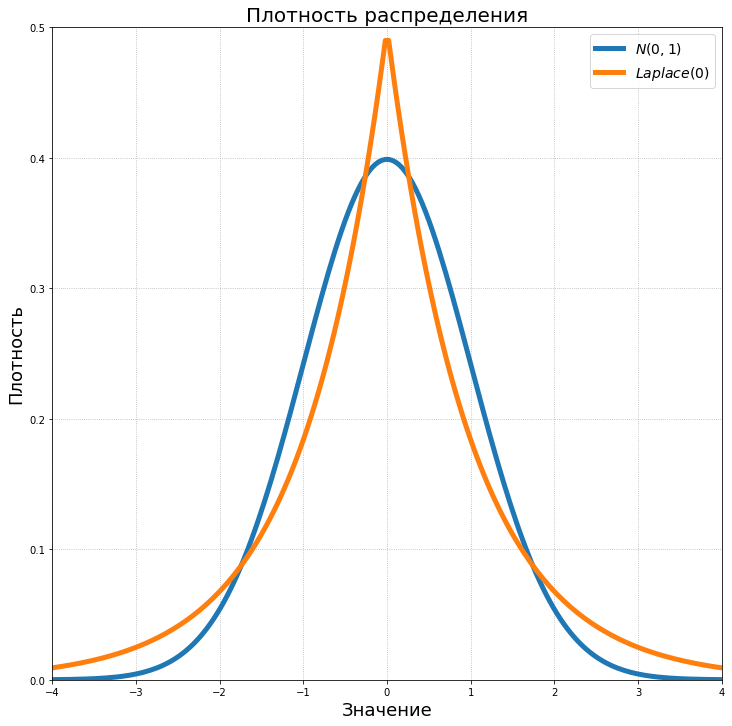

In [ ]:
xmin = -4
xmax = 4
ymax = 0.5
grid_size = 200

plt.figure(figsize=(12, 12))
grid = np.linspace(xmin, xmax, grid_size)  
plt.grid(ls=':')
plt.xlabel('Значение', fontsize=18)
plt.ylabel('Плотность', fontsize=18)
plt.xlim((xmin, xmax))
plt.ylim((None, ymax))
plt.title('Плотность распределения', fontsize=20)

plt.plot(grid, sps.norm.pdf(grid, loc=0, scale=1), lw=5, label=r'$N(0, 1)$')
plt.plot(grid, sps.laplace.pdf(grid, loc=0, scale=1), lw=5, label=r'$Laplace(0)$')
plt.legend(fontsize=14);

**Вывод:**  распределения симметричны относительно $0$, центральная часть распределения Лапласа обладает бОльшей вероятностной массой, т. е. центральные значения будут ближе к $0$, чем у нормального распределения. С другой стороны, хвосты у распределения Лапласа тяжелее, поэтому будет больше значений выборок с краю, чем у нормального.

**2**. Чему равна асимптотическая дисперсия $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, $0 < \alpha < 1/2$, для распределения Лапласа? Помочь в ее вычислении может теорема, упомянутая на лекциях. Посчитайте асимптотическую дисперсию аналитически. Постройте график зависимости асимптотической дисперсии $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$ от $\alpha$,  $0 < \alpha < 1/2$. 

Является ли эта функция монотонной? Найдите пределы функции при $\alpha \to+ 0$ и $\alpha \to 1/2 - 0$. Сравните со значениями асимптотической дисперсии для выборочного среднего и выборочной медианы (не забудьте отметить их на графике). Сделайте вывод.

**Решение:**

Из $5$-го теор. дз известно, что асимптотическая дисперсия усеченного среднего для распределения Лапласа равна $\frac{4\alpha\ln{2\alpha} + 2(1 - 2\alpha)}{(1-2\alpha)^2}$.

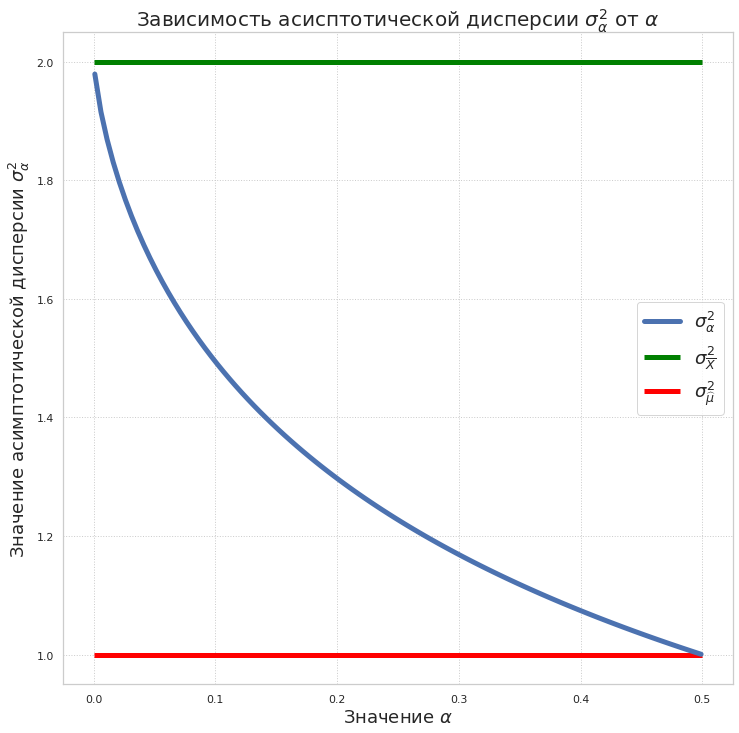

In [ ]:
alpha = np.linspace(0.001, 0.499, 100)
sns.set(style='whitegrid')

plt.figure(figsize=(12, 12))
plt.grid(ls=':')
plt.xlabel(r'Значение $\alpha$', fontsize=18)
plt.ylabel(r'Значение асимптотической дисперсии $\sigma^2_{\alpha}$', fontsize=18)
plt.title(
    r'Зависимость асимптотической дисперсии $\sigma^2_{\alpha}$ от $\alpha$',
    fontsize=20
)

plt.plot(
    alpha,
    (4*alpha*np.log(2*alpha) + 2*(1 - 2*alpha)) / (1 - 2*alpha)**2,
    lw=5,
    label=r'$\sigma^2_{\alpha}$'
)

plt.hlines(2, 0, 0.5, label=r'$\sigma^2_{\overline{X}}$', color='green', lw=5)
plt.hlines(1, 0, 0.5, label=r'$\sigma^2_{\widehat{\mu}}$', color='red', lw=5)
plt.legend(loc='right', fontsize=18);

**Вывод:** 1) как видно из графика, эта функция монотонна.

2) Найдём пределы: $\lim_\limits{\alpha\rightarrow 0+} \sigma^2_{\alpha} = 2, \lim_\limits{\alpha\rightarrow 0.5-} \sigma^2_{\alpha} = 1$. Из того же дз известно, что $\sigma^2_{\overline{X}} = 2, \sigma^2_{\widehat{\mu}} = 1.$ Видно, что ас. дисперсия медианы наименьшая, а ас. дисперсия выборочного среднего наибольшая. Значения ас. дисперсий усеченного среднего лежат между ними. 

3) Таким образом, распределение Лапласа удивительно тем, что с увеличинием асимптотической толерантности оценки её асимптотическая эффективность растёт!

**3.** Сгенерируйте выборку $X = \left(X_1, \dots, X_{1000} \right)$ из стандартного распределения Лапласа. Для всех $n \leqslant 1000$ по первым $n$ элементам выборки $X_1, \dots, X_n$ вычислите значения следующих оценок:
- $\overline{X}$  —  выборочное среднее;
- $\widehat{\mu}$ —  выборочная медиана;
- $W$ — медиана по всем значениям $Y_{ij} = \frac{X_i + X_j}{2}, 1 \leq i \leq j \leq n$ — медиана средних Уолша. 

В случае выборочной медианы и медианы средних Уолша можно использовать цикл по подвыборкам.

На одном графике изобразите зависимость значений этих оценок от $n$. Настройте видимую область графика по оси y так, чтобы четко была отображена информативная часть графика. Сравните асимптотические дисперсии оценок. Сделайте вывод.

**Решение:**

In [ ]:
sample_size = 1000
sample = sps.laplace.rvs(size=sample_size, loc=0, scale=1)

sample_mean = sample.cumsum() / (np.arange(sample_size) + 1) # Выборочное среднее считаем сразу
sample_med = np.empty(sample_size, dtype=np.float64)
sample_walsh_med = np.empty(sample_size, dtype=np.float64)

for n in range(sample_size):
    cur_sample = sample[:n+1]
    sample_med[n] = np.median(cur_sample)
    # Если сложить вектор-строку и вектор столбец одинакового размера, 
    # то получится матрица A попарных сумм элементов вектора.
    # Тогда медиана сплюснутой A/2 даст медиану средних Уолша.
    pairwise_sums = cur_sample.reshape(-1, 1) + cur_sample
    sample_walsh_med[n] = np.median(pairwise_sums / 2)

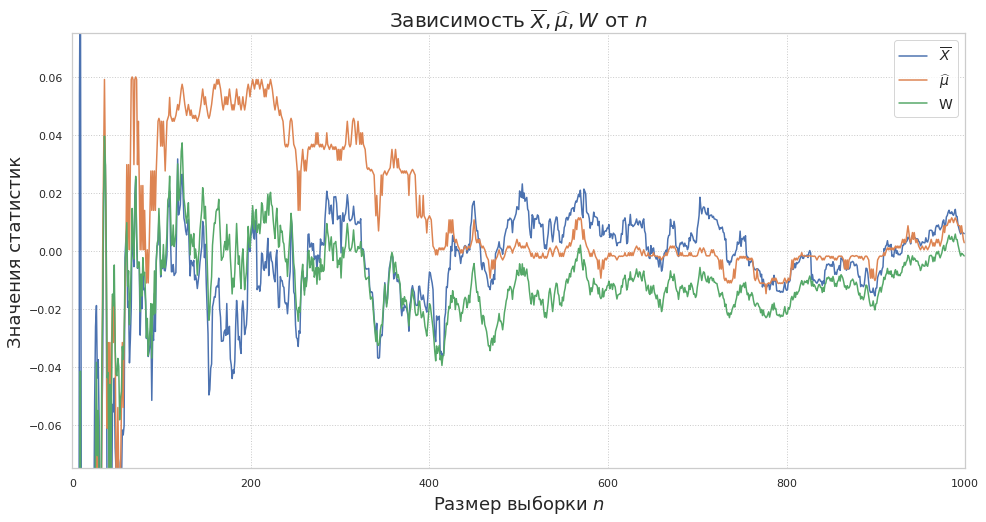

In [ ]:
plt.figure(figsize=(16, 8))
plt.grid(ls=':')
plt.xlabel(r'Размер выборки $n$', fontsize=18)
plt.ylabel('Значения статистик', fontsize=18)
plt.xlim((0, sample_size))
plt.ylim((-0.075, 0.075))
plt.title(r'Зависимость $\overline{X}, \widehat{\mu}, W$ от $n$', fontsize=20)

plt.plot(sample_mean, label=r'$\overline{X}$')
plt.plot(sample_med, label=r'$\widehat{\mu}$')
plt.plot(sample_walsh_med, label=r'W')
plt.legend(fontsize=14);

**Вывод:** из графика видно, что быстрее всех сужается к $0$ область значений выборочной медианы. Также заметно, что область значений медианы средних Уолша сужается к нулю немного побыстрее, чем область значений выборочной дисперсии. Отсюда можно сделать вывод, что медиана имеет наименьшую асимптотическую дисперсию, а медиана средних Уолша имеет асимптотическую дисперсию меньше, чем выборочное среднее.

Также можно отметить, что эмпирические результаты согласуются с аналитическими результатами. А ещё видна интересная закономерность: графики для выборочного среднего и медианы среднего Уолша очень похожи с той лишь разницей, что придаёт бОльшее значение основной массе реализаций выборки.

______________
### Задача 4. Gamma-cats (Cauchy)
Предлагается изучить некоторые свойства распределения Коши с параметром сдвига $\theta$, обладающего плотностью распределения $p_{\theta}(x) = \frac{1}{\pi \left(1 + \left(x- \theta\right)^2\right)}$.

*Замечание:* Такое распределение встречается, к примеру, в следующей задаче. На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Тогда $X_i, i=1,...,n$ — зарегистрированные координаты точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости — образуют выборку из распределения Коши со сдвигом $\theta$.

**1.** На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду.

**Решение:**

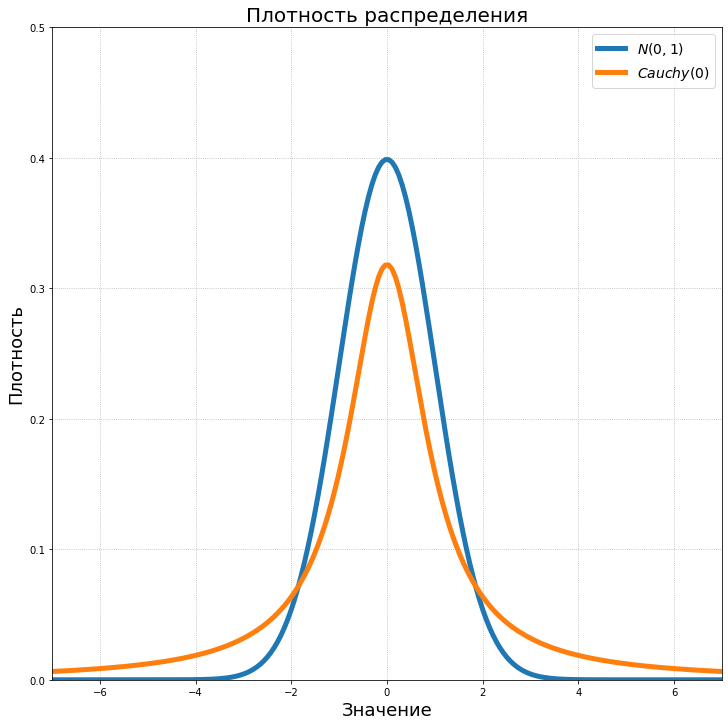

In [ ]:
xmin = -7
xmax = 7
ymax = 0.5
grid_size = 200

plt.figure(figsize=(12, 12))
grid = np.linspace(xmin, xmax, grid_size)  
plt.grid(ls=':')
plt.xlabel('Значение', fontsize=18)
plt.ylabel('Плотность', fontsize=18)
plt.xlim((xmin, xmax))
plt.ylim((None, ymax))
plt.title('Плотность распределения', fontsize=20)

plt.plot(grid, sps.norm.pdf(grid, loc=0, scale=1), lw=5, label=r'$N(0, 1)$')
plt.plot(grid, sps.cauchy.pdf(grid, loc=0, scale=1), lw=5, label=r'$Cauchy(0)$')
plt.legend(fontsize=14);

**Вывод:** из графика плотности видно, что у распределения Коши вероятностная масса хвостов сильно больше, а вот центра --- меньше, поэтому реализация выборки из распределения Коши будет содержать меньше значений в центре и больше значений с краёв.

**2.** Чему равна асимптотическая дисперсия $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, $0 < \alpha < 1/2$, для распределения Коши? Помочь в ее вычислении может теорема, упомянутая на лекциях. Посчитайте асимптотическую дисперсию аналитически. Постройте график зависимости асимптотической дисперсии $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, $0 < \alpha < 1/2$, от $\alpha$.

Настройте видимую область графика по оси *y* так, чтобы четко была отображена информативная часть графика. Отметьте на графике минимум функции.

**Решение:**

С учётом того, что $F_{\xi}(x) = \frac{1}{\pi}\arctan(x) + \frac{1}{2} \Rightarrow u_{1-\alpha} = \tan\left(\pi\left(\frac{1}{2} - \alpha\right)\right)$ можно получить:$$
\sigma_{\alpha}^2 = \frac{2}{(1-2\alpha)^2}\left(\int_0^{u_{1-\alpha}}x^2\frac{1}{\pi(1+x^2)}\,dx + u_{1-\alpha}^2\alpha\right) = \frac{2}{(1-2\alpha)^2}\left(\frac{1}{\pi}\tan\left(\frac{\pi}{2}-\pi\alpha\right) + \tan^2\left(\frac{\pi}{2}-\pi\alpha\right)\alpha - \frac{1}{2} + \alpha\right)
$$

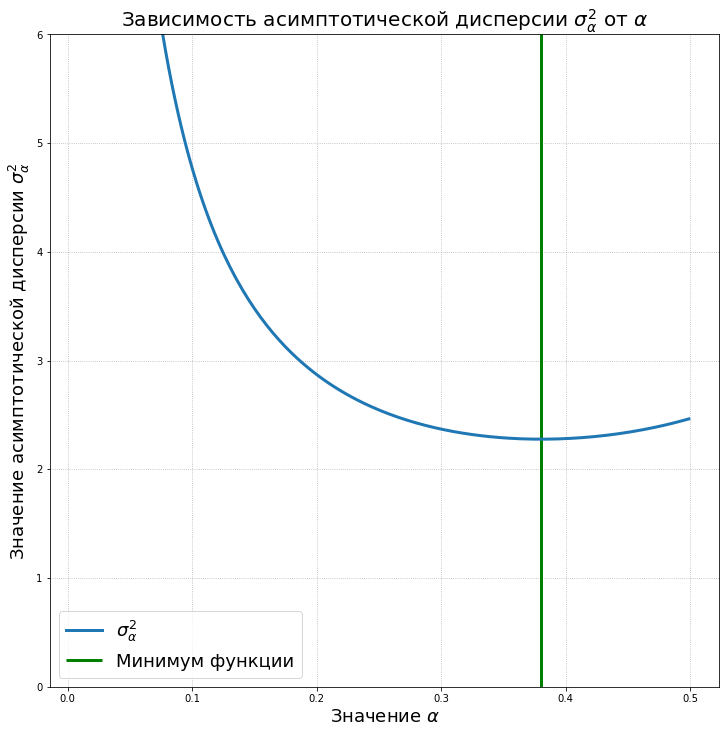

In [ ]:
alpha = np.linspace(0.01, 0.499, 200)

plt.figure(figsize=(12, 12))
plt.grid(ls=':')
plt.xlabel(r'Значение $\alpha$', fontsize=18)
plt.ylabel(r'Значение асимптотической дисперсии $\sigma^2_{\alpha}$', fontsize=18)
plt.title(
    r'Зависимость асимптотической дисперсии $\sigma^2_{\alpha}$ от $\alpha$',
    fontsize=20
)
plt.ylim(0, 6)

tan = np.tan(np.pi/2 - np.pi*alpha) 
plt.plot(
    alpha,
    (2/np.pi*tan + 2*tan**2 * alpha - 1 + 2*alpha) / (1 - 2*alpha)**2,
    lw=3,
    label=r'$\sigma^2_{\alpha}$'
)

# Численный поиск минимума функции даёт x = 0.3803
x_min = 0.3803
plt.vlines(x_min, 0, 6, label=r'Минимум функции', color='green', lw=3)
plt.legend(loc='lower left', fontsize=18);

При каком значении $\alpha$ асимптотическая дисперсия $\sigma^2_{\alpha}$ минимальна и чему она равна? Ответ можно найти численно.

**Ответ:** численный поиск точки минимума даёт точку $(0.3803, 2.2776)$.

Также отметим, что распределение Коши, в отличие от распределений Лапласа или стандартного нормального, имеет, так сказать, идеальное соотношение между робастностью и асимптотической эффективностью.

**3.** Сгенерируйте выборку $X = \left(X_1, \dots, X_{1000} \right)$ из стандартного распределения Коши. Для всех $n \leqslant 1000$ по первым $n$ элементам выборки $X_1, \dots, X_n$ вычислите значения следующих оценок:
- $\overline{X}$  —  выборочное среднее;
- $\overline{X}_{\alpha}$ —  усеченное среднее, где $\alpha$ &mdash; значение, на котором достигается минимум $\sigma^2_{\alpha}$;
- $\widehat{\mu}$ —  выборочная медиана;
- $W$ — медиана по всем значениям $Y_{ij} = \frac{X_i + X_j}{2}, 1 \leq i \leq j \leq n$ — медиана средних Уолша;

а также, по каждой из этих оценок, одношаговую оценку. 
В случае выборочной медианы и медианы средних Уолша можно использовать цикл по подвыборкам.

**Напоминание:** если $\widehat{\theta}_0$ — асимптотически нормальная оценка, то одношаговая оценка $\widehat{\theta}_1$ вычисляется как $\widehat{\theta}_1 = \widehat{\theta}_0 - \left(l''_X(\widehat{\theta}_0) \right)^{-1} l'_X(\widehat{\theta}_0)$, где $l_X(\theta)$ — логарифмическая функция правдоподобия. Заметим, что обычное выборочное среднее не является асимптотически нормальной оценкой, и оценка, вычисленная по формуле выше, формально не является одношаговой, однако ее все равно требуется посчитать.

На одном графике изобразите зависимость значений этих оценок от $n$. Для каждой оценки $\widehat{\theta}_0$ соответствующая оценка $\widehat{\theta}_1$ должна быть изображена на графике пунктиром тем же цветом, что и $\widehat{\theta}_0$. 

Сравните асимптотические дисперсии оценок. Сделайте вывод.

**Замечание:** если некоторые оценки имеют большой разброс, и разница между графиками зависимостей оценок с малыми значениями недостаточно заметна, стоит сделать два графика, на одном из которых будут изображены все оценки, а на втором &mdash; только достаточно хорошие.

**Решение:**

Приведём выражения производных логарифмической функции правдоподобия:$$
l_X'(\widehat{\theta_0}) = \sum\limits_{i=1}^n\frac{2(X_i - \widehat{\theta_0})}{1+(X_I-\widehat{\theta_0})^2}\\
l_X''(\widehat{\theta_0}) = 2\sum\limits_{i=1}^n\frac{1-(X_i-\widehat{\theta_0})^2}{(1+(X_i-\widehat{\theta_0})^2)^2}
$$

In [ ]:
sample_size = 1000
sample = sps.cauchy.rvs(size=sample_size, loc=0, scale=1)

sample_med = np.empty(sample_size, dtype=np.float64)
sample_walsh_med = np.empty(sample_size, dtype=np.float64)
sample_mean = sample.cumsum() / (np.arange(sample_size) + 1) # Выборочное среднее считаем сразу

# Для усечённого среднего создадим массив-маску, который будет оставлять нужный диапазон индексов,
# а именно от i + 1 до n в i-й строке
best_alpha = 0.3803
mask = np.ones((sample_size, sample_size), dtype=np.bool)
ui = np.triu_indices(sample_size, 1)
mask[ui] = False
# Теперь оставим нужные значения, растянув sample так, чтобы вдоль axis==0
# шли копии выборки, а вдоль axis==1 --- сама выборка, и применив mask
sample_prefixes = np.ma.masked_array(np.zeros(sample_size).reshape(-1, 1) + sample, ~mask)
trimmed_mean = sps.mstats.trimmed_mean(sample_prefixes, best_alpha, axis=1)

for n in range(sample_size):
    cur_sample = sample[:n+1]
    sample_med[n] = np.median(cur_sample)
    # Если сложить вектор-строку и вектор столбец одинакового размера, 
    # то получится матрица A попарных сумм элементов вектора.
    # Тогда медиана сплюснутой A/2 даст медиану средних Уолша
    pairwise_sums = cur_sample.reshape(-1, 1) + cur_sample
    sample_walsh_med[n] = np.median(pairwise_sums / 2)

In [ ]:
# Теперь посчитаем одношаговые оценки
def first_partial_l(sample_prefixes: np.ma.masked_array, estim):
    '''
    Вычисляет значение первой производной l_X(\theta) в точке
    \theta = \widehat{\theta_0}.
    Аргументы:
        sample_prefixes --- двумерный массив выборок, в i-й строке которого
                            содержатся элементы выборки с 1-го по i-й
        estim --- одномерный массив оценок, полученных для каждого
                  i = \overline{1, n}
    Возвращает:
        numpy массив, заполенный значениями первой производной
        при каждом i = \overline{1, n}
    '''
    # Заметим, что estim = (1, n) => он растянется вдоль оси x, как не нужно.
    # Ведь из каждой подвыборки должна вычитаться одна и та же оценка,
    # поэтому транспонируем массив estim
    estim = estim.reshape(-1, 1)
    partial_l = 2*(sample_prefixes - estim) / (1 + (sample_prefixes - estim)**2)
    
    return partial_l.sum(axis=1)

def double_partial_l(sample_prefixes: np.ma.masked_array, estim):
    '''
    Вычисляет значение второй производной l_X(\theta) в точке
    \theta = \widehat{\theta_0}.
    Аргументы:
        sample_prefixes --- двумерный массив выборок, в i-й строке которого
                            содержатся элементы выборки с 1-го по i-й
        estim --- одномерный массив оценок, полученных для каждого
                  i = \overline{1, n}
    Возвращает:
        numpy массив, заполенный значениями второй производной
        при каждом i = \overline{1, n}
    '''
    estim = estim.reshape(-1, 1)
    double_partial_l = \
    2*(1 - (sample_prefixes - estim)**2) / (1 + (sample_prefixes - estim)**2)**2
    
    return double_partial_l.sum(axis=1)

def calc_single_step_estim(sample: np.array, estim: np.array):
    '''
    Вычисляет значение одношаговой оценки по заданной выборке и оценке для
    каждого i = \overline{1, n}.
    Аргументы:
        sample --- одномерный массив - выборка.
        estim --- одномерный массив оценок, полученных для каждого
                  i = \overline{1, n}
    Возвращает:
        массив одношаговых оценок при каждом i = \overline{1, n}
    '''
    sample_size = sample.shape[0]
    mask = np.ones((sample_size, sample_size), dtype=np.bool)
    ui = np.triu_indices(sample_size, 1)
    mask[ui] = False
    sample_prefixes = np.ma.masked_array(
        np.zeros(sample_size).reshape(-1, 1) + sample,
        ~mask
    )
    
    return estim - first_partial_l(sample_prefixes, estim) /\
double_partial_l(sample_prefixes, estim)

In [ ]:
single_step_med = calc_single_step_estim(sample, sample_med)
single_step_walsh_med = calc_single_step_estim(sample, sample_walsh_med)
single_step_mean = calc_single_step_estim(sample, sample_mean)
single_step_trimmed_mean = calc_single_step_estim(sample, trimmed_mean)

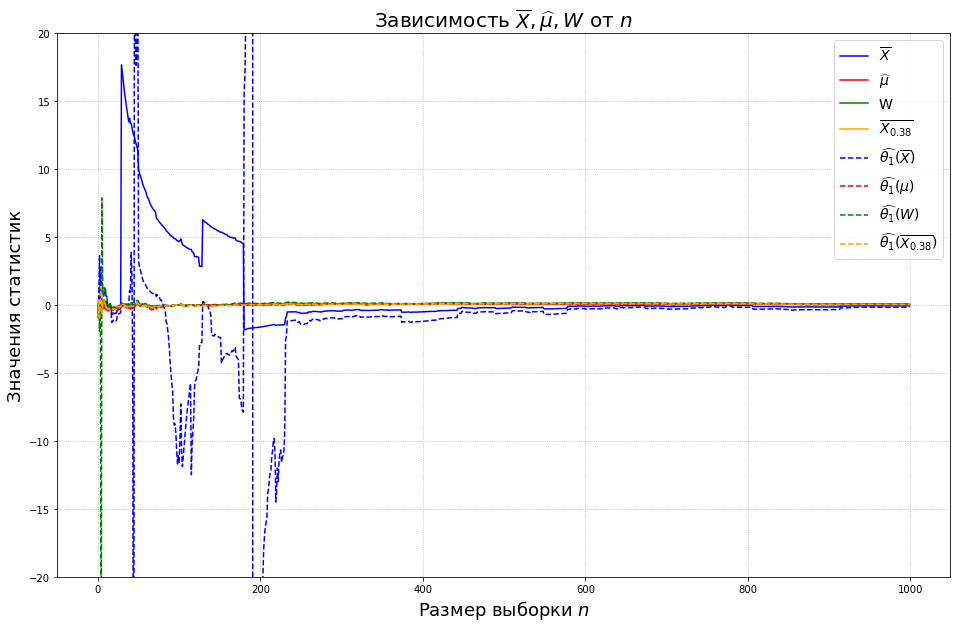

In [ ]:
plt.figure(figsize=(16, 10))
plt.grid(ls=':')
plt.xlabel(r'Размер выборки $n$', fontsize=18)
plt.ylabel('Значения статистик', fontsize=18)
plt.ylim((-20, 20))
plt.title(r'Зависимость $\overline{X}, \widehat{\mu}, W$ от $n$', fontsize=20)

plt.plot(sample_mean, 'b', label=r'$\overline{X}$')
plt.plot(sample_med, 'r', label=r'$\widehat{\mu}$')
plt.plot(sample_walsh_med, 'g', label=r'W')
plt.plot(trimmed_mean, 'orange', label=r'$\overline{X}_{0.38}$')
plt.plot(single_step_mean, 'b--', label=r'$\widehat{\theta_1}(\overline{X})$')
plt.plot(single_step_med, 'r--', label=r'$\widehat{\theta_1}(\widehat{\mu})$')
plt.plot(single_step_walsh_med, 'g--', label=r'$\widehat{\theta_1}(W)$')
plt.plot(single_step_trimmed_mean, linestyle='--', color='orange',
         label=r'$\widehat{\theta_1}(\overline{X}_{0.38})$')
plt.legend(fontsize=14, loc='upper right');

Выборочное среднее явно портит всё картину. Уберём его с графика и увеличим масштаб.

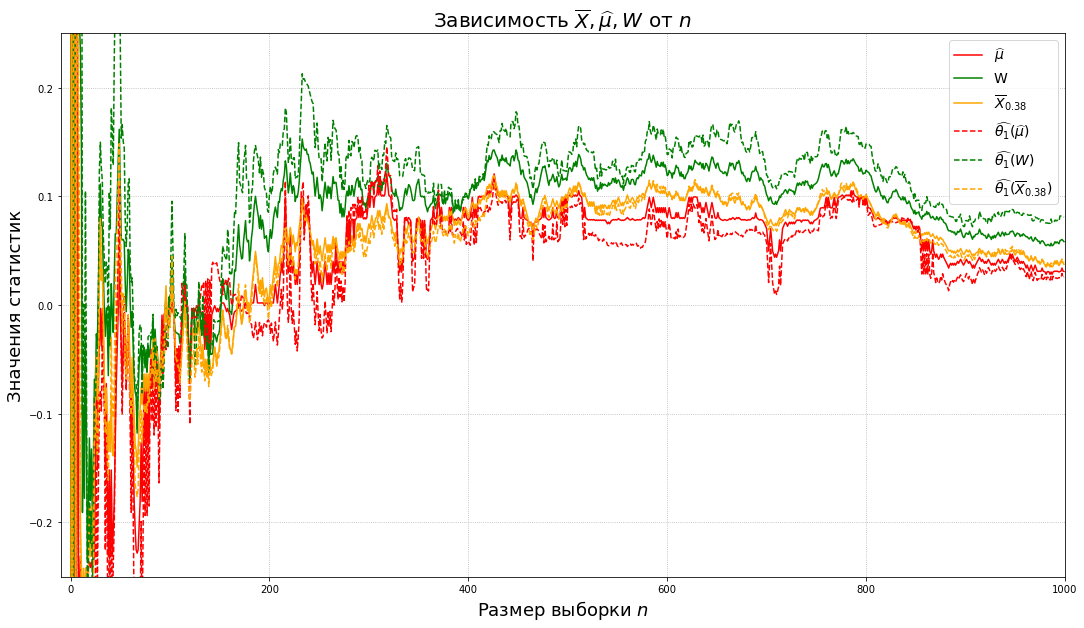

In [ ]:
plt.figure(figsize=(18, 10))
plt.grid(ls=':')
plt.xlabel(r'Размер выборки $n$', fontsize=18)
plt.ylabel('Значения статистик', fontsize=18)
plt.xlim(-10, sample_size)
plt.ylim((-0.25, 0.25))
plt.title(r'Зависимость $\overline{X}, \widehat{\mu}, W$ от $n$', fontsize=20)

plt.plot(sample_med, 'r', label=r'$\widehat{\mu}$')
plt.plot(sample_walsh_med, 'g', label=r'W')
plt.plot(trimmed_mean, 'orange', label=r'$\overline{X}_{0.38}$')
plt.plot(single_step_med, 'r--', label=r'$\widehat{\theta_1}(\widehat{\mu})$')
plt.plot(single_step_walsh_med, 'g--', label=r'$\widehat{\theta_1}(W)$')
plt.plot(single_step_trimmed_mean, linestyle='--', color='orange',
         label=r'$\widehat{\theta_1}(\overline{X}_{0.38})$')
plt.legend(fontsize=14, loc='upper right');

**Вывод:** 1) Выборочнее среднее не является асимптотически нормальной, поэтому так сильно "скачет" и совершенно не отражает значения параметров.

2) Остальные оценки постепенно прижимаются к 0, но медленно. Из теории следует, что у $\overline{X}_{0.38}$ наименьшая дисперсия, поэтому границы её значений должны сжиматься быстрее остальных. На графике это явно заметно для в сравнении с медианой средних Уолша, но границы значений обычной медианы тоже сжимается достаточно быстро. Для более детального анализа нужно получить множество реализаций выборки и смотреть уже по множеству графиков границы значений.

Если же брать теоретические значения при $\theta = 0$, то дисперсии следующие: $\sigma_{\widehat{\mu}}^{2} = \frac{\pi^{2}}{4} \approx 2.5, \sigma_{\overline{X}_{0.38}}^{2} \approx 2.3, \sigma_{W}^{2} = \frac{\pi^{2}}{3} \approx 3.29, \sigma_{\widehat{\theta_{1}}}^{2} = 2$.

3) Видно, что в случае с усечённым средним одношаговая оценка близка по значениям к $\overline{X}_{0.38}$, для медианы средних Уолша отстоит от $0$ дальше, чем сама $W$, а вот для медианы обычной, наоборот, ближе к $0$, чем $\mu$.

_____________
### Задача 5. Weather
На сегодняшний день возобновляемые источники энергии становятся все более востребованными. К таким источникам относятся, например, ветрогенераторы. Однако их мощность очень трудно прогнозировать. В частности, выработка энергии при помощи ветрогенератора сильно зависит от скорости ветра. Поэтому предсказание скорости ветра является очень важной задачей. Скорость ветра часто моделируют с помощью распределения Вейбулла, которое имеет плотность:
$$p_\theta(x) = \frac{kx^{k-1}}{\lambda^k} e^{-(x/\lambda)^k} I \{x \geq 0\},$$
где $\theta = (k, \lambda)$ &mdash; двумерный параметр. К сожалению, найти точную оценку максимального правдоподобия на $\theta$ не получится.  В данном задании нужно найти оценку максимального правдоподобия приближенно с помощью поиска по сетке.

За распределение Вейбулла отвечает класс `weibull_min` из модуля `scipy.stats`, которое задается так: `weibull_min(c=`$k$ `, scale=`$\lambda$ `)`.

**Выборка:** Создайте выборку по значеням среднесуточной скорости ветра на некоторой местности для нескольких лет (не менее трех). Данные можно получить <a href="https://yadi.sk/d/eOE-psoPfw8gHg">отсюда</a>. Можно выбрать любой файл.

In [4]:
# Был выбран файл 4.csv
wind_data = pd.read_csv(path.joinpath('wind_4.csv'))
wind_data.head()

,Year,Month,Day,Mean,Min,Max
0,1966,1,1,5.1,0.0,NaN
1,1966,1,2,10.2,0.0,NaN
2,1966,1,3,21.6,0.0,NaN
3,1966,1,4,6.8,0.0,NaN
4,1966,1,5,4.9,0.0,NaN


*a).* Найдите оценку максимального правдоподобия параметра $\theta = (k, \lambda)$ с точностью $10^{-5}$ при помощи поиска по двумерной сетке.

Двумерную сетку можно создать с помощью функции `numpy.mgrid[from:to:step, from:to:step]`. Если попробовать сразу создать сетку с шагом $10^{-5},$ то может не хватить памяти. Поэтому найдите сначала максимум по сетке с большим шагом, затем сделайте сетку с маленьким шагом в окрестности найденной точки. При вычислении без циклов, возможно, придется создавать трехмерные объекты.

Функция `numpy.argmax` выдает не очень информативный индекс, поэтому пользуйтесь следующей функцией.

In [5]:
def cool_argmax(array):
    return np.unravel_index(np.argmax(array), array.shape)

Нарисуйте график плотности с параметрами, соответствующим найденным ОМП, а так же нанесите на график гистограмму.

**Решение:**

In [19]:
wind_sample = wind_data['Mean'].dropna()

k_limits = [0.01, 10]
cur_k = 0.01
cur_l = 0.01
l_limits = [0.01, 10]
# Потребуется 6 итераций, так как сначала ещё нужно определить рязряд единиц
for i in range(1, 7):
    grid = np.mgrid[k_limits[0]:k_limits[1]:10j, l_limits[0]:l_limits[1]:10j]
    sample = np.broadcast_to(wind_sample, (10, 10, wind_sample.shape[0])) # Теперь вдоль оси z идёт выборка при каждой i, j
    logpdf_vals = sps.weibull_min(c=grid[0], scale=grid[1]).logpdf(sample.T)
    
    argmax = cool_argmax(logpdf_vals.sum(axis=0))
    cur_k = grid[0][argmax]
    cur_l = grid[1][argmax]
    k_limits = [cur_k - 10**(-i), cur_k + 10**(-i)]
    l_limits = [cur_l - 10**(-i), cur_l + 10**(-i)]
print('Параметры, подобранные с точностью до 10^(-5): k = {0:.5f}, lambda = {1:.5f}'.format(cur_k, cur_l))

Параметры, подобранные с точностью до 10^(-5): k = 2.11889, lambda = 6.58378


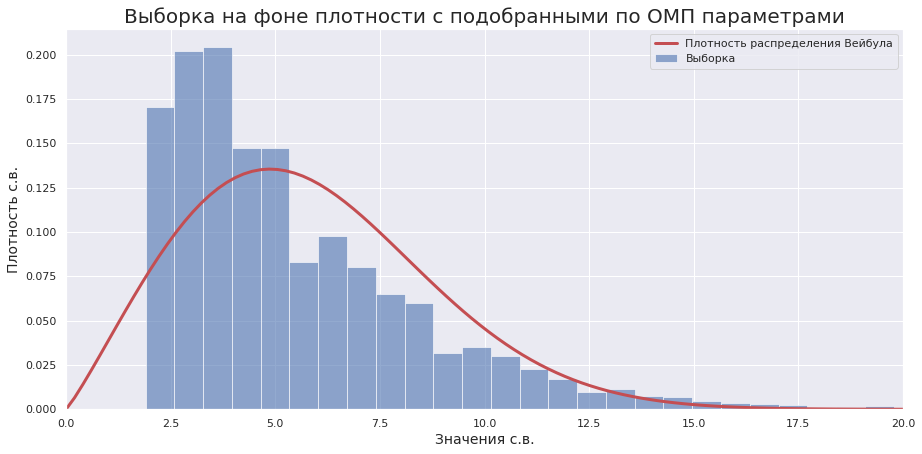

In [20]:
sns.set('notebook')
grid = np.linspace(0, 20, 100)
plt.figure(figsize=(15, 7))

plt.hist(
    wind_sample,
    bins=80,
    density=True,
    alpha=0.6,
    label='Выборка'
)

plt.plot(
    grid,
    sps.weibull_min(c=2.11889, scale=6.58378).pdf(grid),
    color='r',
    linewidth=3,
    label=r'Плотность распределения Вейбула',
)
plt.xlabel('Значения с.в.', fontsize=14)
plt.ylabel('Плотность с.в.', fontsize=14)
plt.legend(loc="upper left",  fontsize=14)
plt.xlim((0, 20))
plt.grid(ls='-')
plt.title('Выборка на фоне плотности с подобранными по ОМП параметрами',  fontsize=20)
plt.legend(loc='upper right');

*b).* Обозначим $\widehat{\theta} = \left(\widehat{\lambda}, \widehat{k}\right)$ &mdash; ОМП. Запишите уравнение правдоподобия (все частные производные в точке экстремума логарифмической функции правдоподобия должны быть равны $0$). Используя одно из равенств, можно выразить $\widehat{\lambda}$ через значения $X_1, \dots, X_n, \widehat{k}$; подставив это выражение в другое равенство, получить уравнение на $\widehat{k}$. Решите это уравнение приближенно с помощью метода Ньютона и получите $\widehat{k}$, а значит, и $\widehat{\lambda}$.

**Решение:**

Запишем уравнения правдоподобия для $l_{X}(\theta) = n\ln(k) + (k-1)\sum\limits_{i=1}^n \ln(X_i) - nk\ln(\lambda) - \sum\limits_{i=1}^n\left(\frac{X_i}{\lambda}\right)^k$:$$
\frac{\partial l_X(\theta)}{\partial k} = \frac{n}{k} + \sum\limits_{i=1}^n \ln(X_i) - n\ln(\lambda) - \sum\limits_{i=1}^n\left(\frac{X_i}{\lambda}\right)^k\ln\left(\frac{X_i}{\lambda}\right) = 0,\\
\frac{\partial l_X(\theta)}{\partial\lambda} = -\frac{nk}{\lambda} - \sum\limits_{i=1}^n \frac{(-k)(X_i)^k}{\lambda^{k+1}} = 0.
$$
Из них можно получить $\widehat{\lambda}$ и уравнение на $\widehat{k}$:$$
\widehat{\lambda} = \sqrt[\scriptstyle\widehat{k}]{\frac{\sum\limits_{i=1}^n (X_i)^{\widehat{k}}}{n}};\ \ \ \ \frac{n}{k} + \sum\limits_{i=1}^n \ln(X_i) - \frac{n}{k}\ln\left(\frac{\sum_{i=1}^n (X_i)^k}{n}\right) - \frac{n}{\sum_{i=1}^k (X_i)^k}\cdot\sum\limits_{i=1}^n\left[(X_i)^k\left(\ln(X_i) - \frac{1}{k}\ln\left(\frac{\sum_{i=1}^n (X_i)^k}{n}\right)\right)\right] = 0.
$$
В методе Ньютона нужна вторая производная $l''$, поэтому посчитаем её. Заметим, что лямбду можно считать константой:$$
\frac{\partial^2 l}{\partial k^2} = -\frac{n}{k^2} - \sum\limits_{i=1}^n \left(\frac{X_i}{\widehat{\lambda}}\right)^k \ln^2\left(\frac{X_i}{\lambda}\right)
$$

In [8]:
wind_sample = wind_data['Mean'].dropna()
n = wind_sample.shape[0]

mle_lambda = lambda k: ((wind_sample**k).mean())**(1/k)

partial_l = lambda k, lambd: n/k + np.sum(np.log(wind_sample)) \
- n*np.log(lambd) - np.sum((wind_sample/lambd)**k * (np.log(wind_sample/lambd)))

double_partial_l = lambda k, lambd: -n/k**2 -\
np.sum((wind_sample/lambd)**k * np.log(wind_sample/lambd)**2)

In [13]:
k = 1.0
for i in range(6):
    cur_lambda = mle_lambda(k)
    # print(k, cur_lambda)
    dl1 = partial_l(k, cur_lambda)
    dl2 = double_partial_l(k, cur_lambda)
    k = k - dl1 / dl2
print('Значения параметров, полученные с помощью метода Ньютона: '\
       +'k = {0:.3f}, lambda = {1:.3f}'.format(k, cur_lambda))

Значения параметров, полученные с помощью метода Ньютона: k = 1.833, lambda = 6.304


**Вывод:** 1) Значения почти совпадают.

2) При поиске максимума по прямугольникам можно чётко отслеживать точность, с которой параметры будут приближаться, в этом его преимущество. (Ни на семинарах, ни на лекциях мы не рассматривали точность метода Ньютона). Но этот метод очень затратный в плане вычислительных ресурсов.

Метод Ньютона же достаточно прост, но может потребовать не малых аналитических усилий. Конечно, производные тоже можно считать приближённо, но тогда вычислительная мощность метода Ньютона будет терять силу.

____________________
###  Задача 6. Hodges–Lehmann
Пусть $X = \left( X_1, \dots, X_n \right), n = 9$ &mdash; выборка из распределения $Bern(\theta), \theta \in [0, 1]$. При сравнении оценок будем рассматривать среднеквадратичный риск $MSE_{\widehat{\theta}}(\theta) = \mathsf{E}_\theta \left(\widehat{\theta} - \theta\right)^2$

Известно, что оценка $\overline{X}$  параметра сдвига $\theta$ является наилучшей оценкой в среднеквадратичном подходе среди всех несмещенных оценок.

В минимаксном подходе среди всех оценок наилучшей является оценка Ходжеса-Лемана: $\widetilde{\theta} = \overline{X} + \frac{1}{1 + \sqrt{n}} \left(\frac{1}{2} - \overline{X} \right).$

Сравним точность оценок $\overline{X}$ и $\widetilde{\theta}$.

**1.** Нанесите на один график функции риска $MSE_{\overline{X}} (\theta)$ и $MSE_{\widetilde{\theta}} (\theta)$. Вычислите долю тех $\theta$, при которых $MSE_{\widetilde{\theta}} (\theta) < MSE_{\overline{X}} (\theta)$. 

**Решение:**

Приведём теоретические формулы для MSE:$$
MSE_{\overline{X}}(\theta) = \frac{\theta(1-\theta)}{n}, MSE_{\widetilde{\theta}}(\theta) = \frac{1}{4(1 + \sqrt{n})^2}. 
$$

Доля таких тета, что MSE для оценки Ходжеса-Лемана меньше MSE для выборочного среднего: 0.660.


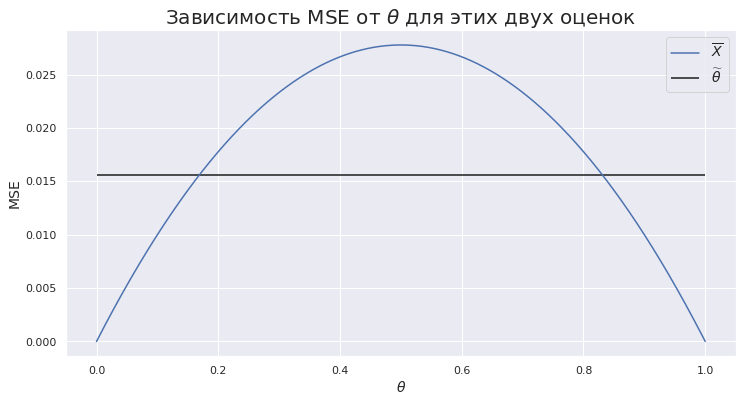

In [15]:
n = 9
theta = np.linspace(0, 1, 1000)
mse_mean = theta * (1 - theta) / n
hodges = 1 / (4 * (1 + n**0.5)**2)
percentage = np.count_nonzero(mse_mean > hodges) / 1000
print('Доля таких тета, что MSE для оценки Ходжеса-Лемана меньше '\
      + 'MSE для выборочного среднего: {0:.3f}.'.format(percentage))

plt.figure(figsize=(12, 6))
plt.plot(theta, mse_mean, label=r'$\overline{X}$')
plt.hlines(hodges, 0, 1, label=r'$\widetilde{\theta}$')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.title(r'Зависимость MSE от $\theta$ для этих двух оценок',  fontsize=20)
plt.legend(loc='upper right', fontsize=14);

**Ответ:** хотя оценка $\overline{X}$ параметра сдвига $\theta$ и является наилучшей оценкой в среднеквадратичном подходе среди всех несмещенных оценок, это ничего не говорит о её хорошести в общем случае. Как видно из расчётов, она проигрывает почти $\frac{2}{3}$ случаев оценке Ходжеса-Лемана по значениям MSE.

**2.** Проведите эксперимент. Сгенерируйте параметры $\theta = \left( \theta_1, \dots, \theta_{1000} \right)$ из распределения $U[0, 1]$ независимо, после чего сгенерируйте выборки $X_k = \left( X_{k1}, \dots, X_{kn} \right) \sim Bern(\theta_k), \; 1 \leqslant k \leqslant 1000, \; n=9$.

По каждой из выборок $X_k$ вычислите оценки $\overline{X_k}$ и $\widetilde{\theta}_k$ и определите, какая из них ближе к $\theta_k$. В какой доле случаев оценка Ходжеса-Лемана оказалась лучше? Похож ли результат на ответ в прошлом пункте? Почему?

**Решение:**

In [53]:
grid_size = 1000
theta = sps.uniform.rvs(size=grid_size)

n = 9
sample = sps.bernoulli.rvs(size=(grid_size, n), p=theta.reshape(-1, 1))

mean = sample.mean(axis=1)
hodges = mean + (0.5 - mean)/(1 + n**0.5)
percentage = np.count_nonzero(np.abs(theta - mean) > np.abs(theta - hodges)) / grid_size * 100
print('Оценка Ходжеса-Лемана оказалась лучше в {0:.1f}% случаев'.format(percentage))

Оценка Ходжеса-Лемана оказалась лучше в 51.6% случаев


**Вывод:** удивительно, но оценка Ходжеса-Лемана оказалась ближе к тета только в половине случаев. Этот результат явно не похож на ответ в прошлом пункте.

Дело в том, что в первом случае мы усредняем отклонения по всем тета, а во втором сравниваем отклонения при конкретных значениях тета, поэтому для выборочного среднего могло так получиться, что где-то его отклонения сильно больше, чем отклонения оценки Ходжеса-Лемана. И вот эти относительно сильные отклонения "отодвинули" всё МО подальше, поэтому в б, когда мы сравниваем без оглядки на остальные значения, доля получается меньше, чем в пункте а.

**3.**  Рассмотрим функцию $p(\theta) = \mathsf{P}_{\theta} \left(\left|\widetilde{\theta} - \theta \right| < \left| \overline{X} - \theta \right| \right)$ &mdash; вероятность того, что оценка $\widetilde{\theta}$ оказалась ближе к $\theta$, чем $\overline{X}$. Можно показать, что при $\theta \leqslant 1/2$ верно равенство $p(\theta) = 1 - \mathsf{P}_{\theta} \left( \frac{\theta - d_n}{1-2d_n} \leqslant \overline{X} \leqslant \frac12 \right)$, где $d_n = \frac{1}{4\left(1+\sqrt{n}\right)}$, причем функция $p(\theta)$ симметрично относительно $1/2$. Такую вероятность можно вычислить, используя функцию распределения (`cdf`) биномиального распределения.

Если параметр $\theta$ случаен, то вероятность того, что оценка $\widetilde{\theta}$ оказажется ближе к $\theta$, равна $p_* = \int\limits_0^1 p(t) dt$, что соответствует площади под кривой графика функции $p(\theta)$.

Постройте график функции $p(\theta)$. Посчитайте вероятность $p_*$ с помощью метода прямоугольников. Сделайте выводы.

**Решение:**

In [152]:
def integrate_rectangle(f, low, high, n):
        """
        Вычисление определенного интеграла методом прямоугольников.
        
        Аргументы:
        f --- векторная функция d-мерной переменной.
            Реализация функции на вход принимает матрицу (n, d),
            где n - число точек, в которых нужно вычислить функцию,
            а d - размерность пространства переменных.
            Функция должна вернуть вектор размерности n.
        low, high --- нижние и верхние пределы интегрирования.
            Передаются в том же порядке, в котором функция 
            принимает аргументы).
        n --- максимальное число вызовов функции f.

        Возвращает приближенное значение интеграла.
        """
        
        dim = len(high)
        low = np.array(low)
        high = np.array(high)
        
        # количество точек, в которых вычисляем функцию
        n_rounded = int(np.floor(n**(1 / dim)))
        diff = (high - low) / (n_rounded - 1) # длины отрезов разбиения
        centers_of_ranges = np.zeros((dim, n_rounded - 1))
        
        # для каждой размерности найдите центры отрезков разбиения
        for d in range(dim):
            centers_of_ranges[d] = np.linspace(
                low[d] + diff[d] / 2, high[d] - diff[d] / 2, n_rounded - 1
            )
        
        centers = np.meshgrid(*centers_of_ranges)
        f_vals = f(np.stack(centers).reshape(dim, -1).T)
        return f_vals.sum() * np.prod(diff)

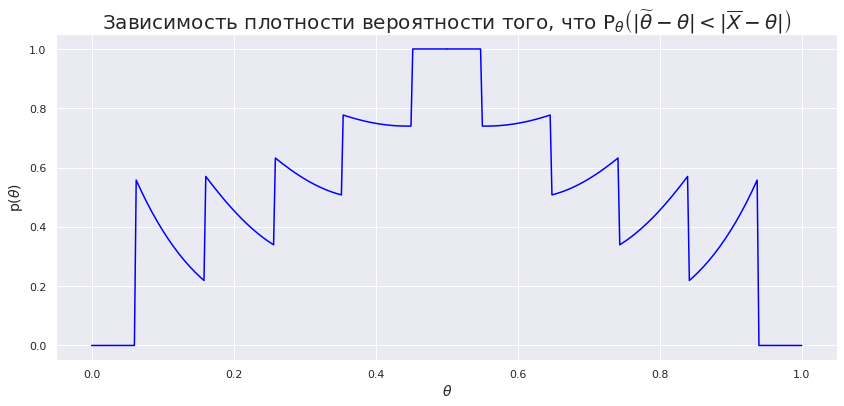

In [153]:
theta = np.linspace(0, 0.5, 200)
n = 9

def p(n, theta):
  binom_rv = sps.binom(n, theta)
  d_n = 1 / (4 * (1 + n**0.5))
  P = binom_rv.cdf(n / 2) - binom_rv.cdf(n * (theta - d_n) / (1 - 2*d_n))
  return 1 - P

plt.figure(figsize=(14, 6))
plt.plot(theta, p(n, theta), c='blue')
plt.plot(1 - theta, p(n, theta), c='blue')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'p($\theta$)', fontsize=14)
plt.title(r'Зависимость плотности вероятности того, что $\mathsf{P}_{\theta} \left(\left|\widetilde{\theta} - \theta \right| < \left| \overline{X} - \theta \right| \right)$',  fontsize=20);

In [154]:
low = [0]
high = [0.5]
n = 9
print("Вероятность p_*: {0:.3f}".format(2 * integrate_rectangle(lambda x: p(n, x), low, high, 1e3)))

Вероятность p_*: 0.508


**Ответ:** посчитанная вероятность почти совпадает с полученной на практике: тут получили $50.8\%$, там всегда получалось около $50\% - 51\%$.

**4.** Исследуйте, как зависит вероятность $p_*$ от размера выборки, постройте график этой зависимости. Сделайте выводы.

**Решение:**

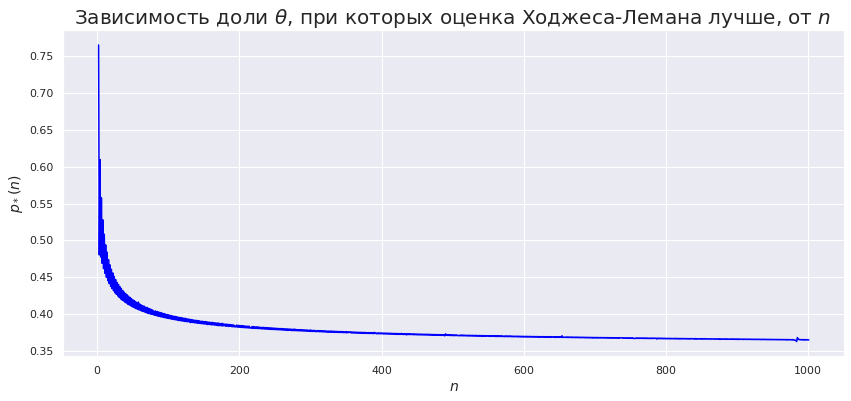

In [160]:
p_vals = np.empty(1000)
for n in np.arange(1000) + 1:
  p_vals[n - 1] = 2 * integrate_rectangle(lambda x: p(n, x), low, high, 1e3)

plt.figure(figsize=(14, 6))
plt.plot(np.arange(1000) + 2, p_vals, c='blue')
plt.xlabel(r'$n$', fontsize=14)
plt.ylabel(r'$p_*(n)$', fontsize=14)
plt.title(r'Зависимость доли $\theta$, при которых оценка Ходжеса-Лемана лучше, от $n$ ',  fontsize=20);

**Ответ:** видим, что при небольших $n$ вероятность больше или равна $0.5$, а при дальнейшем увеличении $n$ доля всё падает и падает. Таким образом, при небольших $n$ выгодно оценивать с помощью Ходжеса-Лемана, а при больших --- с помощью выборочного среднего.